In [40]:
import pandas
dt = pandas.read_csv('Rainfall_data.csv')
dt

,Index,Temperature,Humidity%,Rain
0,0,34,74.2,Yes
1,1,19,68.2,No
2,2,28,67.2,Yes
3,3,29,66.6,Yes
4,4,26,57.9,Yes
...,...,...,...,...
19995,19995,30,77.9,Yes
19996,19996,20,74.8,Yes
19997,19997,14,69.4,No
19998,19998,20,60.6,No


In [41]:
from sklearn.model_selection import train_test_split
Inp = dt.drop(columns=['Index','Rain'])
Out = dt['Rain']

inp_x, tst_x, out_y, tst_y = train_test_split(Inp, Out, test_size=0.05)

In [42]:
from sklearn.tree import DecisionTreeClassifier
CModel = DecisionTreeClassifier()
CModel.fit(inp_x,out_y)

DecisionTreeClassifier()

In [43]:
pred_y=CModel.predict(tst_x)

In [44]:
cmp=pandas.DataFrame({'Actual Values': tst_y.values,
                     'Predicted Values': pred_y.flatten()})
cmp

,Actual Values,Predicted Values
0,No,No
1,No,No
2,Yes,Yes
3,Yes,Yes
4,No,No
...,...,...
995,Yes,Yes
996,Yes,Yes
997,No,No
998,Yes,Yes


In [45]:
from sklearn.preprocessing import LabelEncoder
RainEnc = LabelEncoder()
RainEnc.fit(['Yes','No'])

LabelEncoder()

<AxesSubplot:ylabel='Density'>

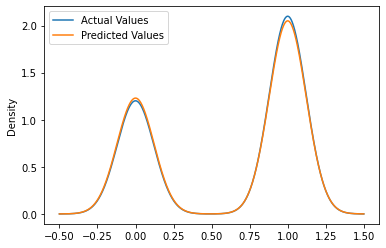

In [46]:
cmp['Predicted Values'] = RainEnc.transform(cmp['Predicted Values'])
cmp['Actual Values'] = RainEnc.transform(cmp['Actual Values'])
cmp.plot(kind='density')

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(tst_y, pred_y)

0.877

cmp.plot(kind='density)